# Azure Developer CLI Project: deploying React web app with a Node.js API and a MongoDB database on Azure 

Azure Developer CLI (`azd`) can be used for streamlined provisioning and deployment to Azure. It has the following features: 
- simple commands for workflow steps
- a library of reusable, extensible templates that are pre-configured for common scenarios
- the ability to convert existing projects into new azd templates
- portable, reusable infrastructure as code scaffolding for the project
- compatibility and support for CI/CD pipelines and monitoring

# Project Prerequisites 
- Azure Developer CLI in Windows Powershell
- Node.js, an open source JavaScript runtime environment often used for building web applications.
- GitHub account
- Azure account


# 1. Using an existing template

`azd` supports a number of templates with the necessary source code and configuration assets for provisioning and deploying applications to Azure. You can view templates by running this command `azd template list`

## Convert your own app into an azd template
You can also convert an existing app into an azd template with the following core steps:
- Initialize the project template with `azd init`
- Create the infrastructure as code files using Bicep or Terraform
- Update the azure.yaml file to tie the app services together with the Azure resources
- Provision & deploy with `azd up`


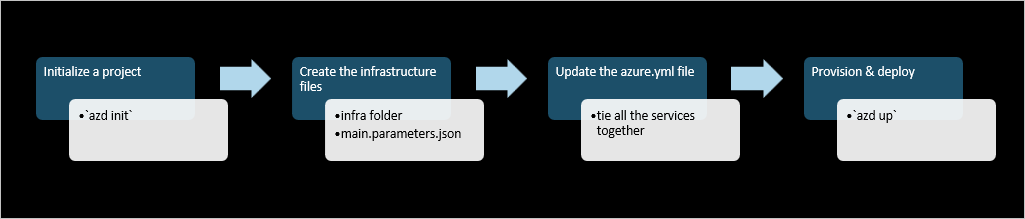

## 1.1. Deploy the interactive "TODO" web app 

We use a sample template called "todo-nodejs-mongo" from Azure Samples Repository on GitHub. This template serves as a blueprint for getting a React web app with a Node.js API and a MongoDB database on Azure.

`azd init --template todo-nodejs-mongo` - to initialise the template

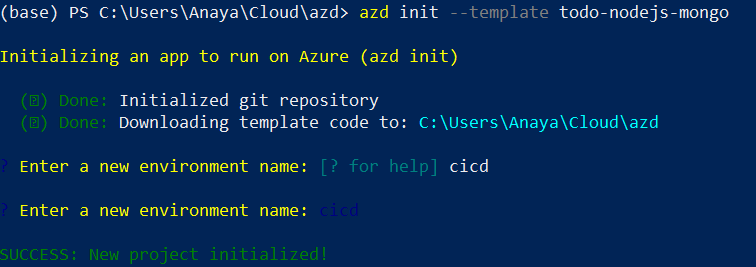

`azd auth login` - to login into Azure portal (opens a web browser for sign in)

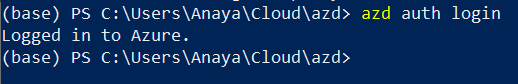


`azd up` - to provision and deploy template resources to Azure. This may take some time to run.  We see the updates printed out in the console as the process runs and a link to the deployed site on completion. 

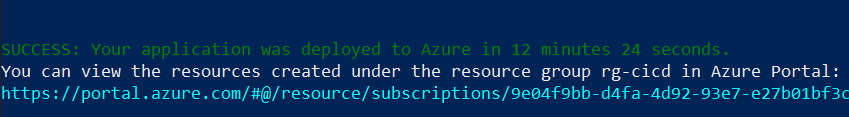

Here how the deployed app looks:

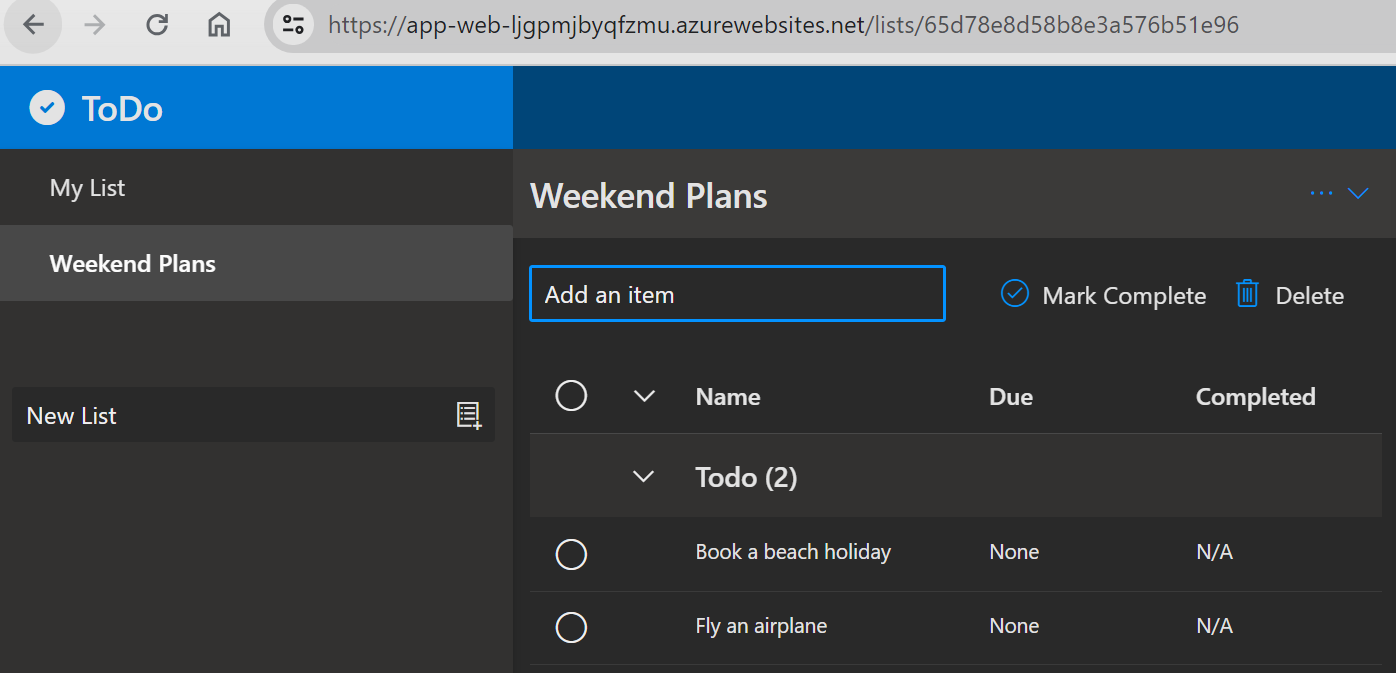

We can see the resource group created by Azure using the environemnt name we chose earlier (azdlearn) and different resources inside the group.  

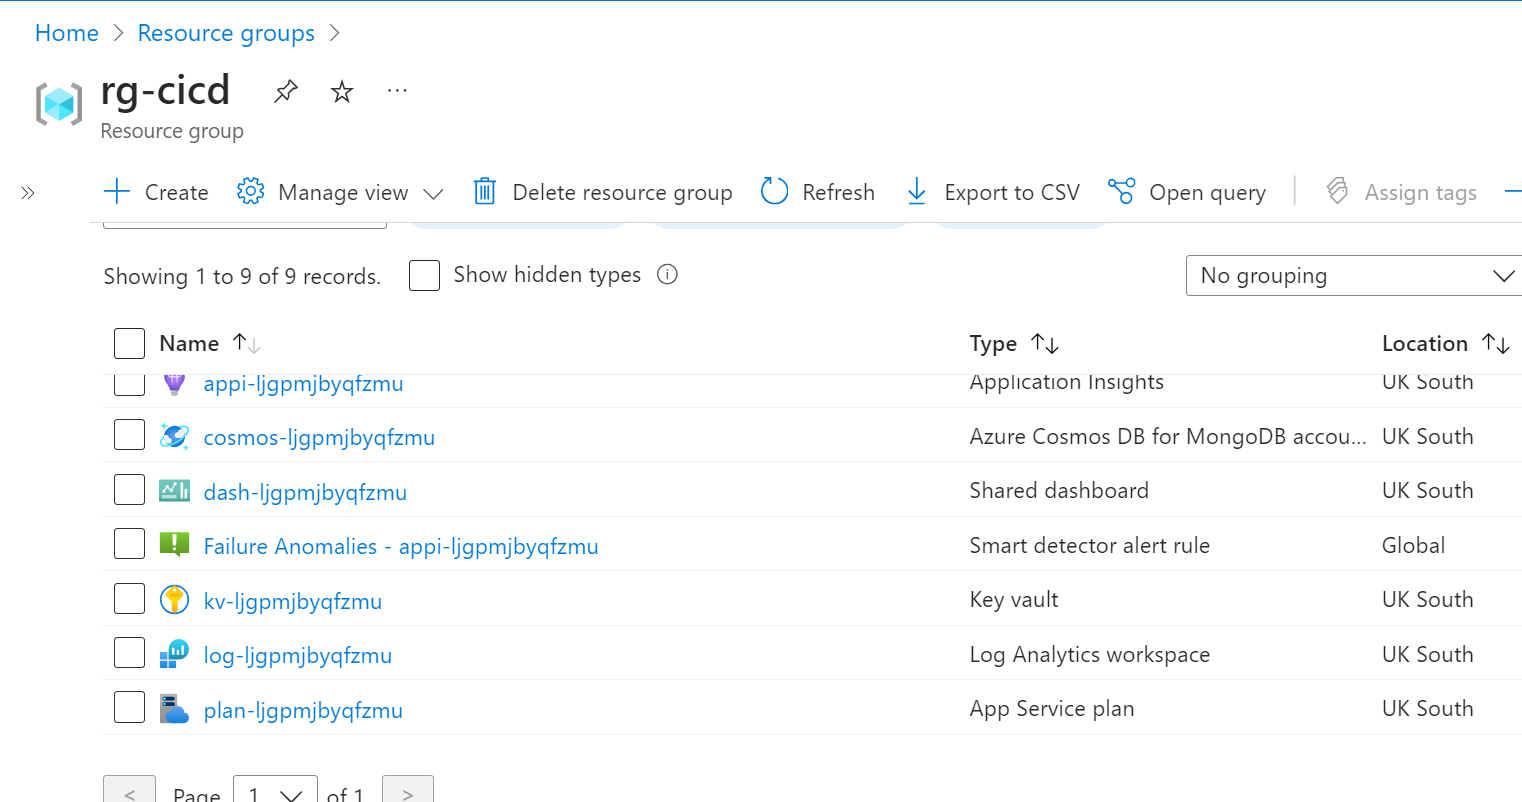

## 1.2. Monitor the TODO application

The Node.js template also provisioned three monitoring dashboards: overview, live metrics and logs. They can be launched by using the `azd monitor` command and one of the following flags:

`--overview` - Launches the main dashboard.
`--live` - Launches the live metrics dashboard.
`--logs` - Launches the logging dashboard.

Let's try `azd monitor -- live` - it lauches the following window in a web browser:

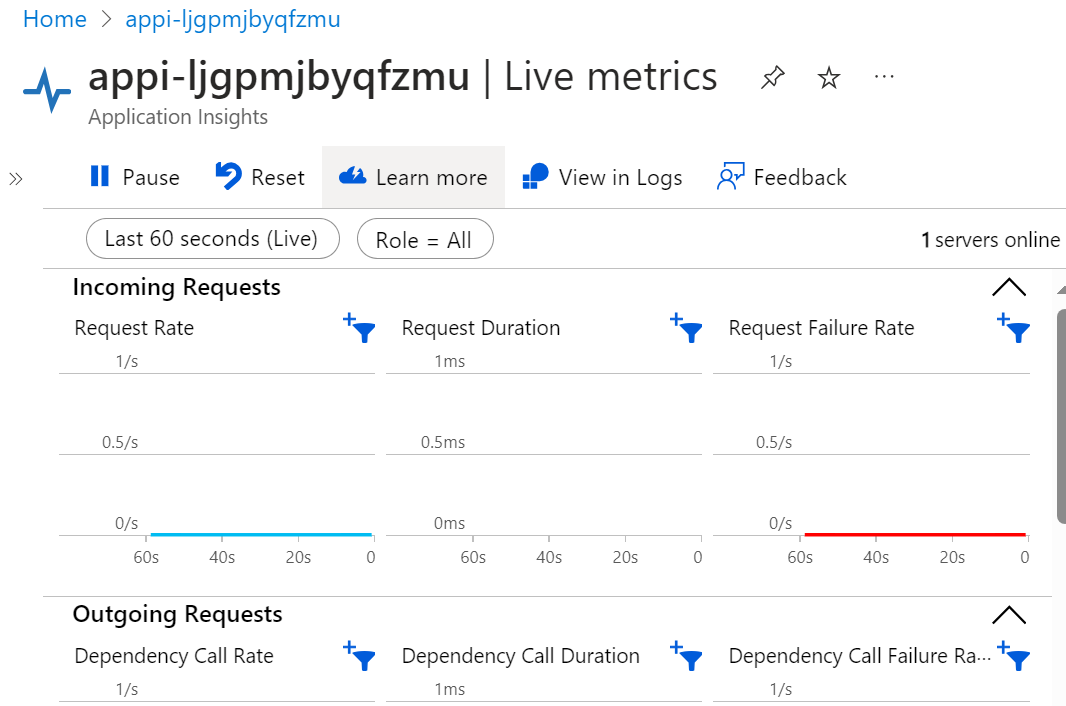

# 2. Customise the template's source app code or infrastructure code

There are different approaches for introducing any changes to the template. In this project we will try the granular approaches of `azd deploy` and `azd provision`:

`azd deploy` - deploy only application source code without executing IaaC files. In our template these are bicep files.  

`azd provision` - create or update Azure resources based on changes to bicep files. 


We can also update the whole environment by running the`azd up` command again.

## 2.1. Update the source app code - `azd deploy`

In this scenario, the company needs a ticket management app - not a Todo app, so we need to change the wording in the website layout. So we only need to change the source code without provisioning any additional resources in the infrastructure.

We locate the header file. One way (and a slow one) of doing it is running a command in Powershell:
`Get-ChildItem -Recurse "header.tsx"`  

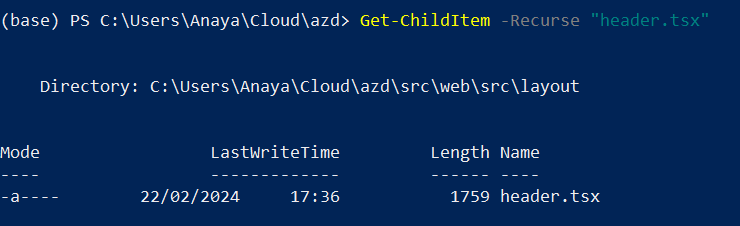

We then open the header.tsx file, for instance, in Vim text editor.

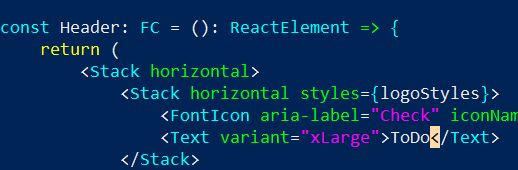

... and write "Ticket Manager" instead of "ToDo" in the header display text.

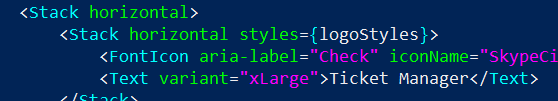

Then save and exit the Vim editor and run `azd deploy` command and go to the website to see the transformation on the webpage:

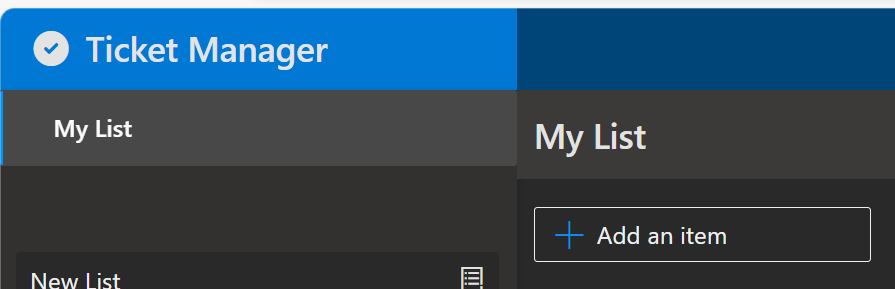

## 2.2. Update the IaaC resources to provision storage for customer files - `azd provision`

The ticket management app needs to provide customers with the option to upload screenshots and other files with their ticket. So we need to provision a storage space to hold these files. This requires the creation of an Azure Storage account and includes the change during the initial setup when this template is provisioned to future environments. 

The IaaC folder `infra` contains various reusable Bicep modules, including oen for storage. We find the file and open it in Vim editor.
`Get-ChildItem -Recurse -Filter "*.bicep" | Where-Object { $_.Name -match 'storage'}`

here it is! We just need to find `main.bicep` file and add a reference to an additional module before the outputs section in the end of the file... 

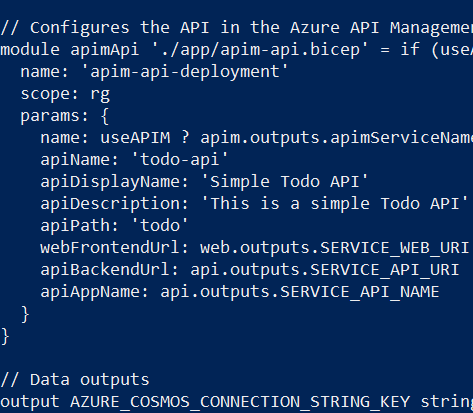  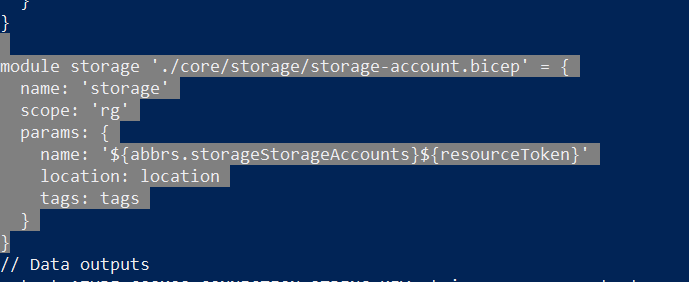

Then we save and exit the editor and run the command `azd provision`:

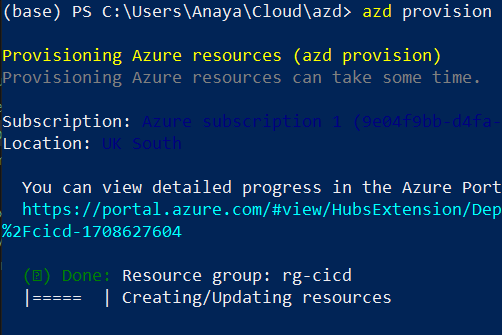

Here is the storage account listed in resources group:

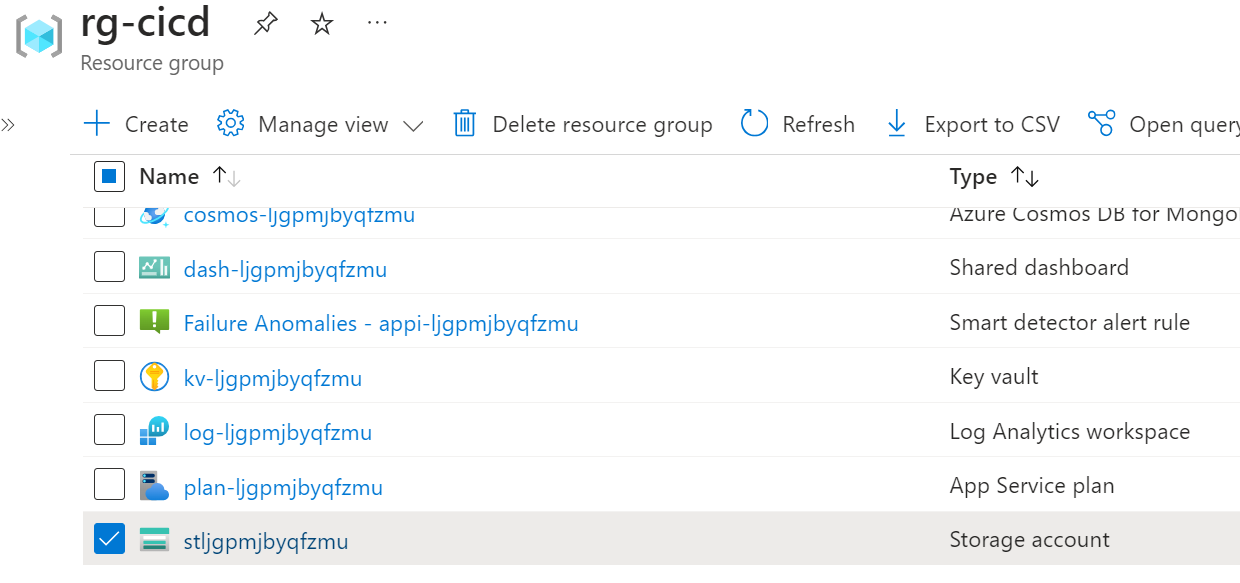

# 3. Configure a CI/CD pipeline 

In the previous steps, we managed workflowsby manually running commands to apply changes to your environment. The workflows can be automated with a CI/CD pipeline with either GitHub Actions or Azure Pipelines. This way Azure environment can be automatically updated with the latest changes by committing and pushing changes to GitHub.

`azd pipiline config`

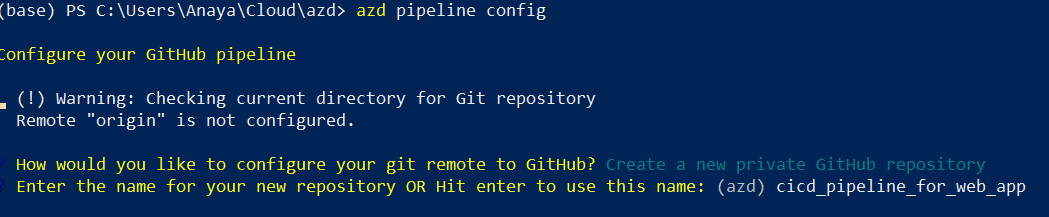


We create a new repository with the name CICD_pipeline and commit project code to it. Azd also congifures a service principal for the app on the Azure subscription, configures a secure connection between Azure and GitHUb repository using the service principal and GitHub secrets.




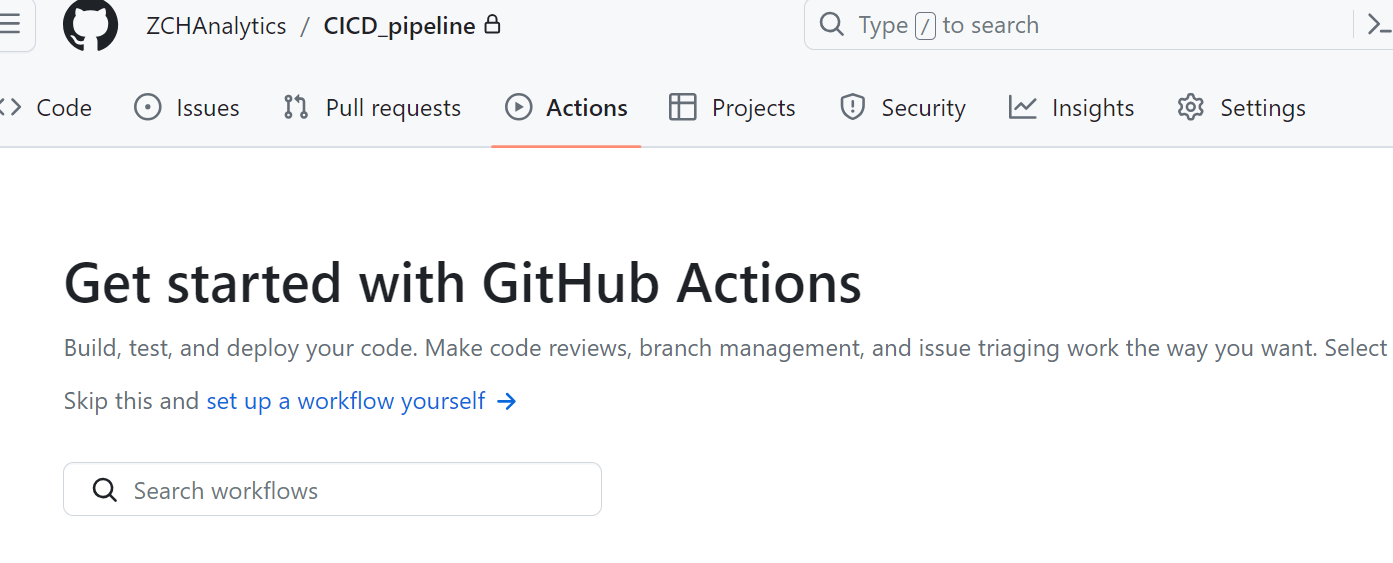